#Read the dataset


In [17]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/nlpp/Train_Task_B.xlsx - Sheet1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        6396 non-null   int64 
 1   Tweet     6395 non-null   object
 2   Hate      6396 non-null   int64 
 3   Target    4101 non-null   object
 4   Severity  4101 non-null   object
dtypes: int64(2), object(3)
memory usage: 250.0+ KB


#EDA


In [18]:
df.fillna("unknown", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        6396 non-null   int64 
 1   Tweet     6396 non-null   object
 2   Hate      6396 non-null   int64 
 3   Target    6396 non-null   object
 4   Severity  6396 non-null   object
dtypes: int64(2), object(3)
memory usage: 250.0+ KB


In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
# Assuming the dataset is loaded into a DataFrame named 'df'
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your dataset path if needed

# 1. Basic Information about the dataset
print("Dataset Info:")
print(df.info())  # Get data types and non-null count
print("\nSummary Statistics:")
print(df.describe())  # Summary statistics for numerical columns
print("\nMissing Values:")
print(df.isnull().sum())  # Check missing values



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        6396 non-null   int64 
 1   Tweet     6396 non-null   object
 2   Hate      6396 non-null   int64 
 3   Target    6396 non-null   object
 4   Severity  6396 non-null   object
dtypes: int64(2), object(3)
memory usage: 250.0+ KB
None

Summary Statistics:
                Id         Hate
count  6396.000000  6396.000000
mean   4010.616948     0.641182
std    2303.636173     0.479691
min       1.000000     0.000000
25%    2025.750000     0.000000
50%    4016.500000     1.000000
75%    6006.250000     1.000000
max    7996.000000     1.000000

Missing Values:
Id          0
Tweet       0
Hate        0
Target      0
Severity    0
dtype: int64


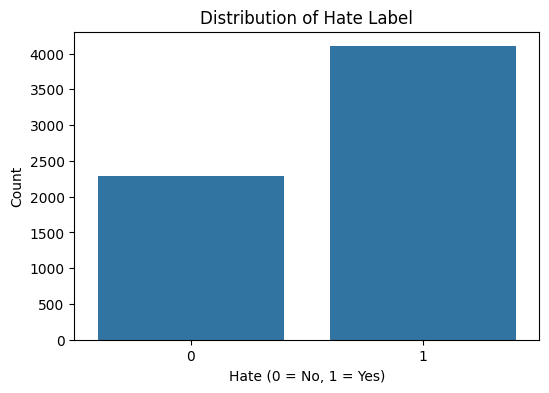

In [20]:
# 2. Distribution of 'Hate' column (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Hate', data=df)
plt.title('Distribution of Hate Label')
plt.xlabel('Hate (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



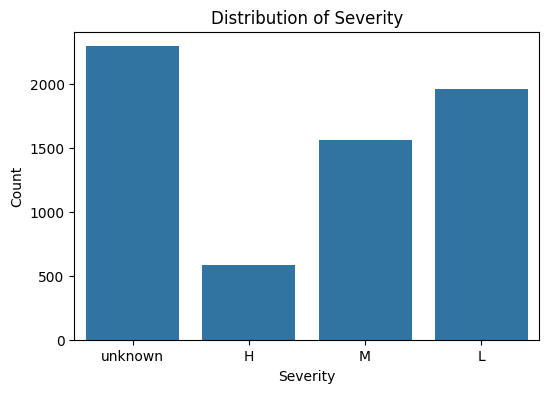

In [21]:
# 3. Distribution of 'Severity' (categorical variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()



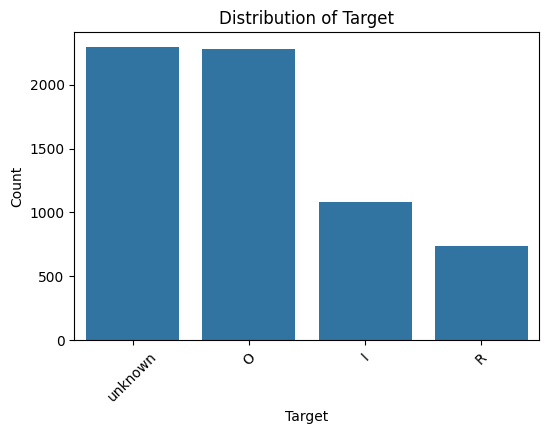

In [22]:
# 4. Distribution of 'Target' column (categorical variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [23]:
# 5. Word Cloud for the 'Tweet' column (Text data)
# Combine all tweets into a single text
all_tweets = ' '.join(df['Tweet'].dropna())




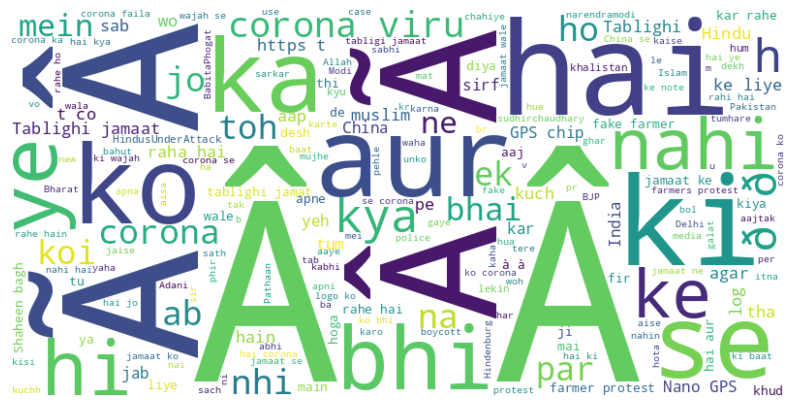

In [24]:
# Generate the word cloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#

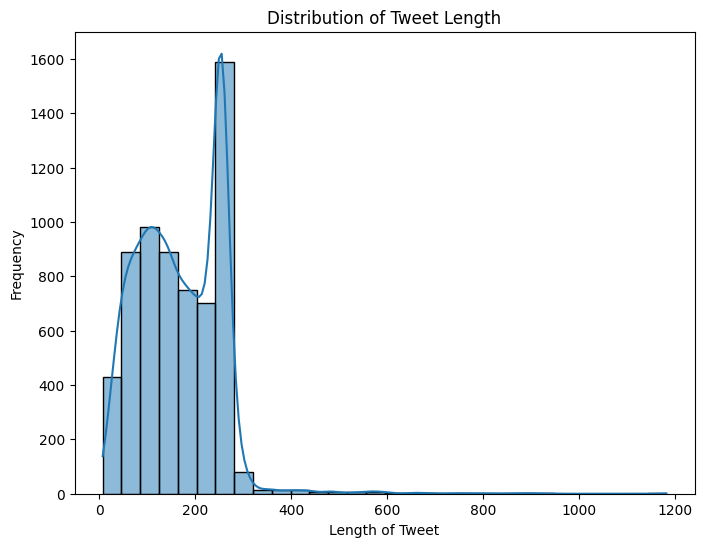

In [25]:


# 7. Checking text length in the 'Tweet' column
df['Tweet_length'] = df['Tweet'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
sns.histplot(df['Tweet_length'], kde=True, bins=30)
plt.title('Distribution of Tweet Length')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()



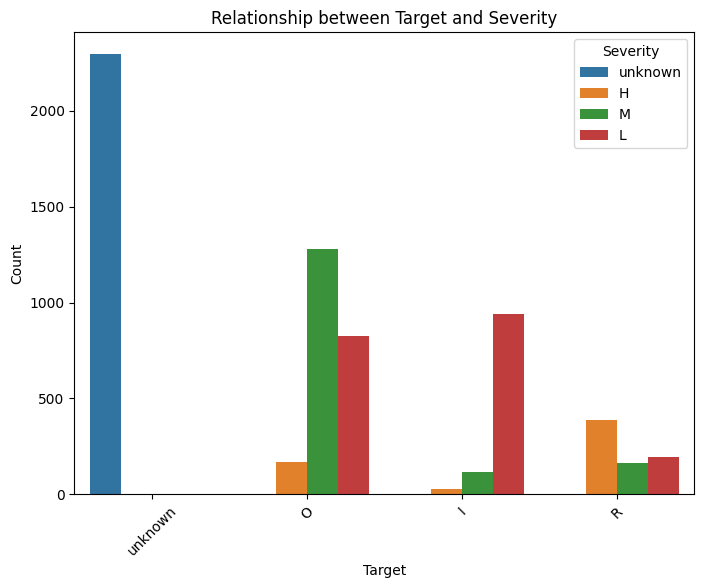

In [26]:
# 8. Analyzing 'Target' and 'Severity' relationship
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', hue='Severity', data=df)
plt.title('Relationship between Target and Severity')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encoding Target
target_encoder = LabelEncoder()
df['Target_Encoded'] = target_encoder.fit_transform(df['Target'])  # I=0, O=1, R=2

# Encoding Severity
severity_encoder = LabelEncoder()
df['Severity_Encoded'] = severity_encoder.fit_transform(df['Severity'])  # L=0, M=1, H=2
# prompt: drop the target and seertiy col

# Drop 'Target' and 'Severity' columns
df = df.drop(['Target', 'Severity'], axis=1)

# Display the updated DataFrame
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                6396 non-null   int64 
 1   Tweet             6396 non-null   object
 2   Hate              6396 non-null   int64 
 3   Tweet_length      6396 non-null   int64 
 4   Target_Encoded    6396 non-null   int64 
 5   Severity_Encoded  6396 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 299.9+ KB


In [28]:
import nltk
nltk.download('punkt') # Download Punkt Sentence Tokenizer
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the 'punkt_tab' data
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



# Initialize stemmer and stop words
english_stopwords = set(stopwords.words('english'))
english_stemmer = PorterStemmer()

def preprocess_text(text):
    # Check if the input is a string; if not, convert it to a string
    if not isinstance(text, str):
        text = str(text)

    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Remove user mentions (Twitter handles)
    text = re.sub(r'@\w+', '', text)

    # Step 3: Remove URLs (both short and long URLs)
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Step 4: Remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)

    # Step 5: Remove numbers
    text = re.sub(r'\d+', '', text)

    # Step 6: Remove extra whitespaces (normalize to a single space)
    text = re.sub(r'\s+', ' ', text).strip()

    # Step 7: Remove non-ASCII characters (including emojis, special symbols)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Step 8: Tokenize the text (split into words)
    words = word_tokenize(text)

    # Step 9: Remove English stop words
    words = [word for word in words if word not in english_stopwords]

    # Step 10: Apply stemming to English words
    words = [english_stemmer.stem(word) for word in words]

    # Step 11: Rejoin the words into a cleaned text
    text = ' '.join(words)

    return text

# Apply preprocessing to the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(preprocess_text)
# df_test['Tweet'] = df_test['Tweet'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [29]:
# prompt: split for train and test
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Tweet'])
y_target = df['Target_Encoded']
y_severity = df['Severity_Encoded']
from imblearn.over_sampling import SMOTE

# Oversample for multi-class (Target)
smote_target = SMOTE(random_state=42)
X_resampled_target, y_resampled_target = smote_target.fit_resample(X, y_target)

# Oversample for multi-class (Severity)
smote_severity = SMOTE(random_state=42)
X_resampled_severity, y_resampled_severity = smote_severity.fit_resample(X, y_severity)

from sklearn.model_selection import train_test_split

# Perform train-test split with resampled data
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(
    X_resampled_target, y_resampled_target, test_size=0.2, random_state=42)

# Check the shapes to confirm alignment

# Split data into training and testing sets for Severity prediction
X_train_severity, X_test_severity, y_train_severity, y_test_severity = train_test_split(
    X_resampled_severity, y_resampled_severity, test_size=0.2, random_state=42
)

In [30]:
print("Shape of X_resampled_target:", X_resampled_target.shape)
print("Shape of y_resampled_target:", y_resampled_target.shape)
print("Shape of X_train_target:", X_train_target.shape)
print("Shape of y_train_target:", y_train_target.shape)


Shape of X_resampled_target: (9180, 5000)
Shape of y_resampled_target: (9180,)
Shape of X_train_target: (7344, 5000)
Shape of y_train_target: (7344,)


In [32]:
# prompt: import random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize the Random Forest classifier
rf_classifier_target = RandomForestClassifier(random_state=42)  # You can adjust parameters as needed

# Train the model for Target prediction
rf_classifier_target.fit(X_train_target, y_train_target)

# Initialize the Random Forest classifier for Severity prediction
rf_classifier_severity = RandomForestClassifier(random_state=42)

# Train the model for Severity prediction
rf_classifier_severity.fit(X_train_severity, y_train_severity)
# Train Random Forest for 'Target'
target_model = RandomForestClassifier(random_state=42)
target_model.fit(X_train_target, y_train_target)

# Predict on test data
y_pred_target = target_model.predict(X_test_target)
# Train Random Forest for 'Severity'
severity_model = RandomForestClassifier(random_state=42)
severity_model.fit(X_train_severity, y_train_severity)

# Predict on test data
y_pred_severity = severity_model.predict(X_test_severity)
print("Target Prediction Metrics:")
print(classification_report(y_test_target, y_pred_target))
print("Accuracy:", accuracy_score(y_test_target, y_pred_target))
print("Confusion Matrix:\n", confusion_matrix(y_test_target, y_pred_target))
print("Severity Prediction Metrics:")
print(classification_report(y_test_severity, y_pred_severity))
print("Accuracy:", accuracy_score(y_test_severity, y_pred_severity))
print("Confusion Matrix:\n", confusion_matrix(y_test_severity, y_pred_severity))


Target Prediction Metrics:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       451
           1       0.82      0.71      0.76       465
           2       0.86      0.93      0.89       449
           3       0.70      0.70      0.70       471

    accuracy                           0.79      1836
   macro avg       0.79      0.79      0.79      1836
weighted avg       0.79      0.79      0.79      1836

Accuracy: 0.7881263616557734
Confusion Matrix:
 [[370   6  19  56]
 [ 47 331  10  77]
 [ 14   9 417   9]
 [ 48  56  38 329]]
Severity Prediction Metrics:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       452
           1       0.62      0.50      0.55       436
           2       0.73      0.77      0.75       477
           3       0.66      0.73      0.69       471

    accuracy                           0.73      1836
   macro avg       0.72      0.72      0.72      1836
weig

In [33]:
# prompt: check macro f1 score

from sklearn.metrics import f1_score

# Calculate macro F1-score for Target prediction
macro_f1_target = f1_score(y_test_target, y_pred_target, average='macro')
print("Macro F1-score for Target prediction:", macro_f1_target)

# Calculate macro F1-score for Severity prediction
macro_f1_severity = f1_score(y_test_severity, y_pred_severity, average='macro')
print("Macro F1-score for Severity prediction:", macro_f1_severity)

Macro F1-score for Target prediction: 0.787913970053106
Macro F1-score for Severity prediction: 0.7215395646749159


In [37]:
# prompt: check overall evalution metric of both  testing

print("Overall Evaluation Metrics:")
print("Target Prediction:")
print(f"  Accuracy: {accuracy_score(y_test_target, y_pred_target)}")
print(f"  Macro F1-score: {f1_score(y_test_target, y_pred_target, average='macro')}")
print("Severity Prediction:")
print(f"  Accuracy: {accuracy_score(y_test_severity, y_pred_severity)}")
print(f"  Macro F1-score: {f1_score(y_test_severity, y_pred_severity, average='macro')}")

Overall Evaluation Metrics:
Target Prediction:
  Accuracy: 0.7881263616557734
  Macro F1-score: 0.787913970053106
Severity Prediction:
  Accuracy: 0.7276688453159041
  Macro F1-score: 0.7215395646749159


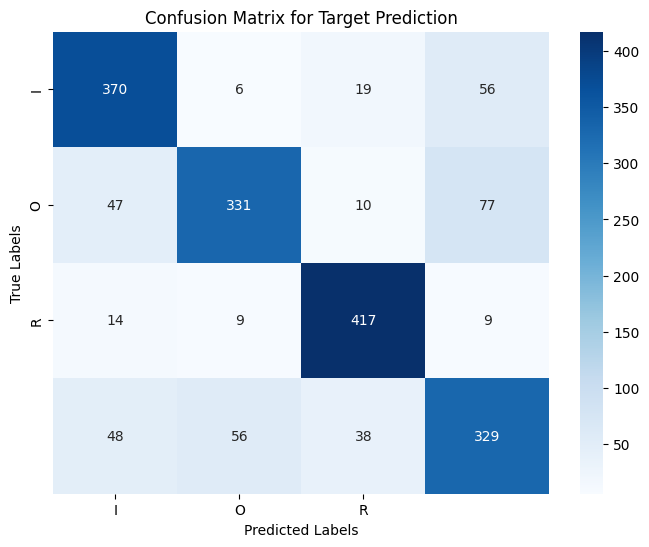

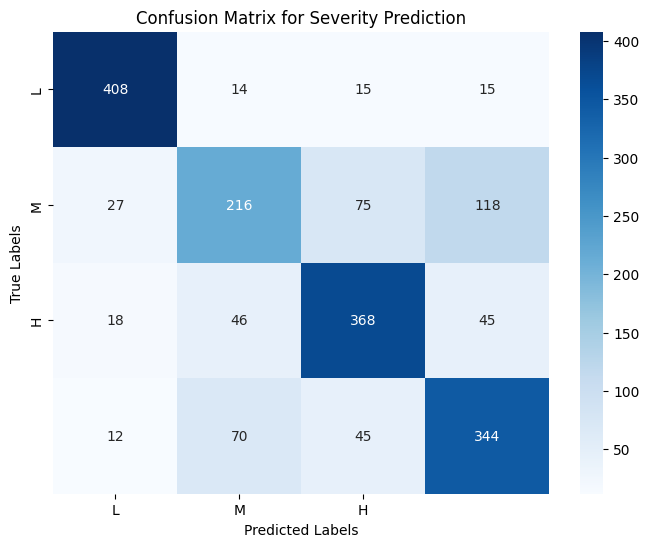

In [38]:
# prompt: perform the confusion matrics chart

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test_target and y_pred_target are already defined from your code
# Create the confusion matrix for Target
cm_target = confusion_matrix(y_test_target, y_pred_target)

# Plot the confusion matrix for Target
plt.figure(figsize=(8, 6))
sns.heatmap(cm_target, annot=True, fmt="d", cmap="Blues",
            xticklabels=['I', 'O', 'R'], yticklabels=['I', 'O', 'R'])  # Replace with your actual labels
plt.title("Confusion Matrix for Target Prediction")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Assuming y_test_severity and y_pred_severity are already defined from your code
# Create the confusion matrix for Severity
cm_severity = confusion_matrix(y_test_severity, y_pred_severity)

# Plot the confusion matrix for Severity
plt.figure(figsize=(8, 6))
sns.heatmap(cm_severity, annot=True, fmt="d", cmap="Blues",
            xticklabels=['L', 'M', 'H'], yticklabels=['L', 'M', 'H']) # Replace with your actual labels
plt.title("Confusion Matrix for Severity Prediction")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

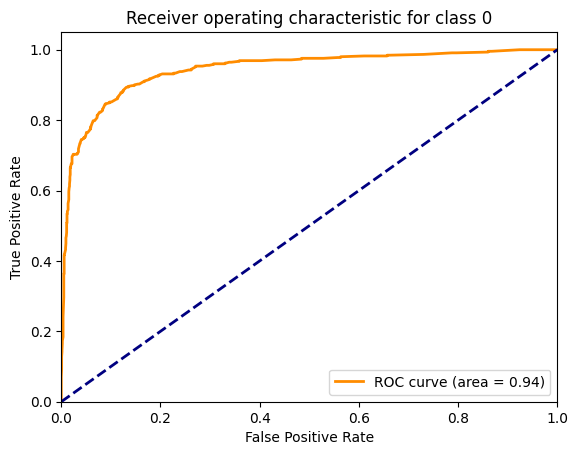

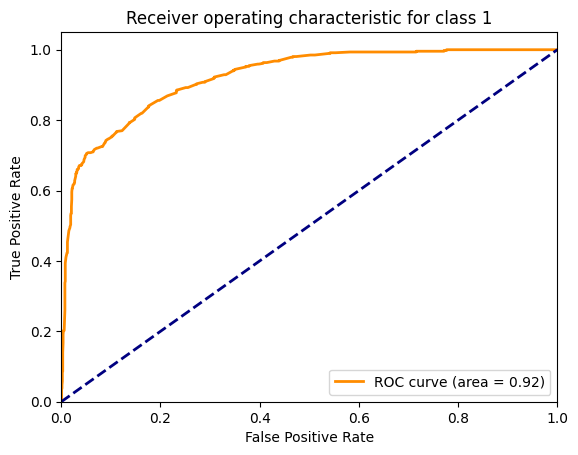

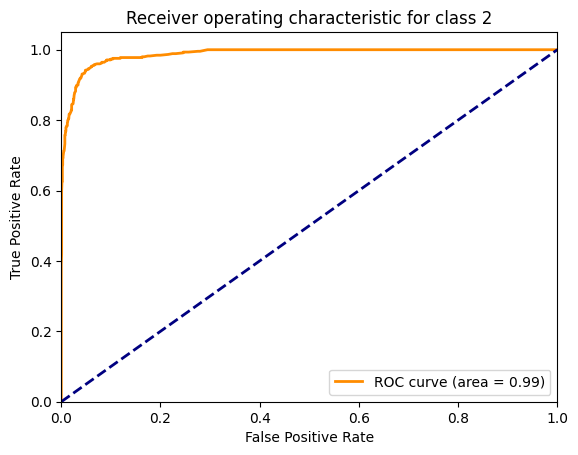

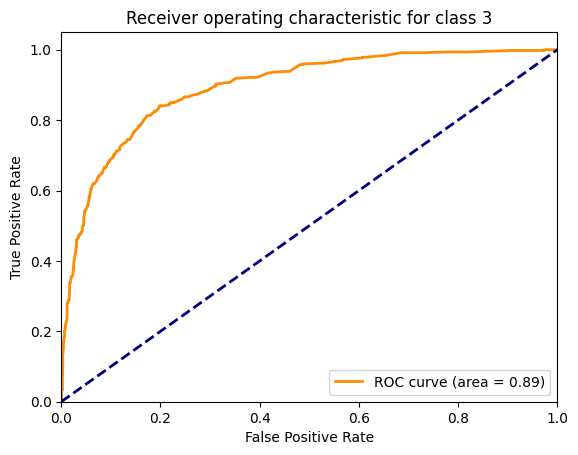

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test_target and y_pred_probabilities_target
# (probabilities of the positive class for each sample)
# Example:
# Get probabilities for all classes
y_pred_probabilities_target = rf_classifier_target.predict_proba(X_test_target)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test_target))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_target, y_pred_probabilities_target[:, i], pos_label=i) # Updated line
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()